In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 
import networkx as nx 

In [2]:
df = pd.read_csv('dataset/Dataset-barang-angkut.csv')

In [3]:
df.head()

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
0,1,Kabupaten Bondowoso,Kabupaten Pacitan,15,1655000,GAS
1,2,Kabupaten Bondowoso,Kabupaten Pacitan,25,2005000,PADAT
2,3,Kabupaten Bondowoso,Kabupaten Pacitan,30,2180000,CAIR
3,4,Kabupaten Bondowoso,Kabupaten Ponorogo,15,1465000,GAS
4,5,Kabupaten Bondowoso,Kabupaten Ponorogo,25,1815000,PADAT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  1956 non-null   int64 
 1   INITIAL             1956 non-null   object
 2   GOAL                1956 non-null   object
 3   BEBAN MUATAN (TON)  1956 non-null   int64 
 4   REWARD              1956 non-null   int64 
 5   JENIS               1956 non-null   object
dtypes: int64(3), object(3)
memory usage: 91.8+ KB


In [5]:
df.shape

(1956, 6)

In [6]:
df.describe(include='number')

,ID,BEBAN MUATAN (TON),REWARD
count,1956.000000,1956.000000,1.956000e+03
mean,978.500000,23.004601,1.263566e+06
std,564.792882,6.936871,3.491886e+05
min,1.000000,10.000000,4.200000e+05
25%,489.750000,15.000000,1.014375e+06
50%,978.500000,25.000000,1.253750e+06
75%,1467.250000,30.000000,1.490000e+06
max,1956.000000,46.000000,2.750000e+06


In [7]:
df.describe(include='object')

,INITIAL,GOAL,JENIS
count,1956,1956,1956
unique,23,61,3
top,Blitar,Kabupaten Pacitan,GAS
freq,90,57,652


# Data Cleansing, Tranformation, Etc..

In [8]:
df.drop('ID', axis=1, inplace=True)

In [9]:
df['INITIAL'].nunique()

23

In [10]:
df['GOAL'].nunique()

61

In [11]:
df['INITIAL'].str.contains('Kabupaten|Kota').sum()

1608

In [12]:
df['GOAL'].str.contains('Kabupaten|Kota').sum()

1608

In [13]:
df['INITIAL'] = df['INITIAL'].replace({'Kabupaten':'', 'Kota':''}, regex=True)
df['GOAL'] = df['GOAL'].replace({'Kabupaten':'', 'Kota':''}, regex=True)

In [14]:
df['INITIAL'] = df['INITIAL'].str.strip()
df['GOAL'] = df['GOAL'].str.strip()

In [15]:
df['INITIAL'].nunique()

22

In [16]:
df['GOAL'].nunique()

30

Text(0.5, 1.0, 'Top 5 INITIAL')

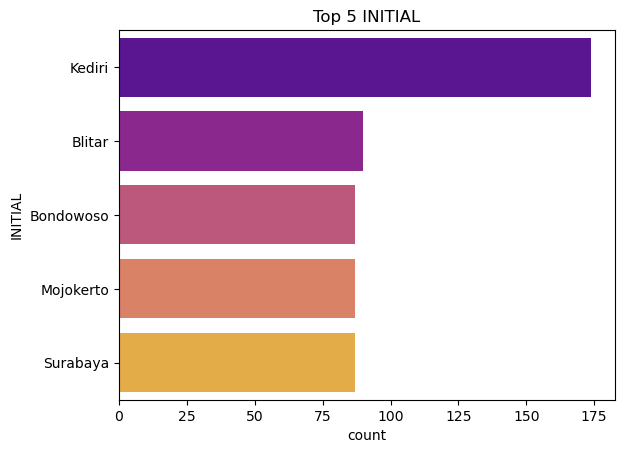

In [17]:
visualize = df['INITIAL'].value_counts().reset_index()
sns.barplot(data=visualize.head(), x='count', y='INITIAL', hue='INITIAL', palette='plasma')
plt.title('Top 5 INITIAL')

Text(0.5, 1.0, 'Top 5 GOAL')

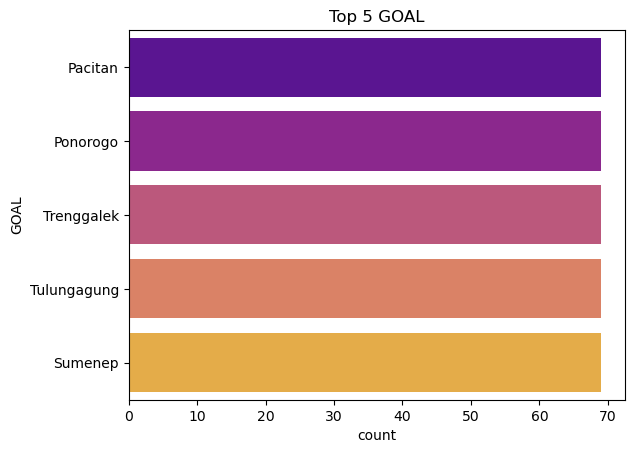

In [18]:
visualize = df['GOAL'].value_counts().reset_index()
sns.barplot(data=visualize.head(), x='count', y='GOAL', hue='GOAL', palette='plasma')
plt.title('Top 5 GOAL')

In [19]:
df['PAIR'] = ''

In [20]:
' '.join(df[['INITIAL', 'GOAL']].iloc[0].values)

for i in range(len(df)):
     df.loc[i, 'PAIR'] = '-'.join(df[['INITIAL', 'GOAL']].iloc[i].values)

In [21]:
df.head()

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR
0,Bondowoso,Pacitan,15,1655000,GAS,Bondowoso-Pacitan
1,Bondowoso,Pacitan,25,2005000,PADAT,Bondowoso-Pacitan
2,Bondowoso,Pacitan,30,2180000,CAIR,Bondowoso-Pacitan
3,Bondowoso,Ponorogo,15,1465000,GAS,Bondowoso-Ponorogo
4,Bondowoso,Ponorogo,25,1815000,PADAT,Bondowoso-Ponorogo


Text(0.5, 1.0, 'Top 5 PAIR')

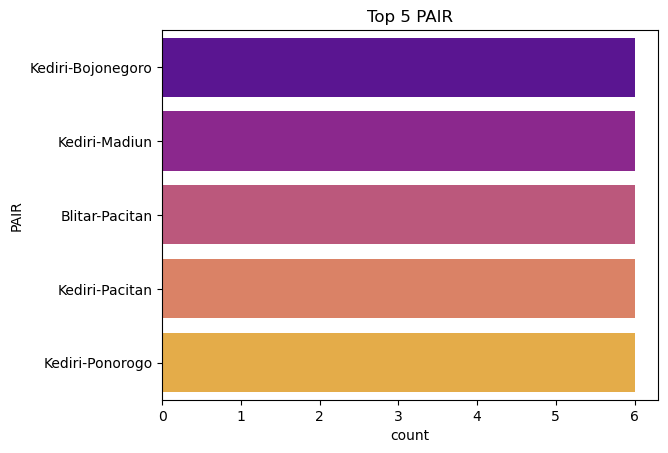

In [22]:
visualize = df['PAIR'].value_counts().reset_index()
sns.barplot(data=visualize.head(), x='count', y='PAIR', hue='PAIR', palette='plasma')
plt.title('Top 5 PAIR')

Let's check if each pair has all the 'JENIS'

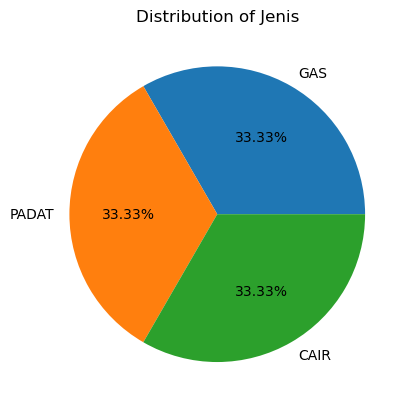

In [23]:
visualize = df['JENIS'].value_counts()
visualize
plt.pie(visualize.values, labels=visualize.index, autopct='%2.2f%%')
plt.title('Distribution of Jenis')
plt.show()

In [24]:
df.groupby(['PAIR','JENIS']).size().reset_index()

,PAIR,JENIS,0
0,Banyuwangi-Bangkalan,CAIR,1
1,Banyuwangi-Bangkalan,GAS,1
2,Banyuwangi-Bangkalan,PADAT,1
3,Banyuwangi-Blitar,CAIR,1
4,Banyuwangi-Blitar,GAS,1
...,...,...,...
1861,Tuban-Trenggalek,GAS,1
1862,Tuban-Trenggalek,PADAT,1
1863,Tuban-Tulungagung,CAIR,1
1864,Tuban-Tulungagung,GAS,1


In [25]:
visualize = df.groupby(['PAIR','JENIS']).size().reset_index().sort_values(0, ascending=False)
visualize[visualize[0] > 1].groupby('PAIR').size().reset_index().sort_values(0, ascending=False)

,PAIR,0
0,Blitar-Pacitan,3
1,Kediri-Bangkalan,3
28,Kediri-Tuban,3
27,Kediri-Trenggalek,3
26,Kediri-Surabaya,3
25,Kediri-Sumenep,3
24,Kediri-Situbondo,3
23,Kediri-Sidoarjo,3
22,Kediri-Sampang,3
21,Kediri-Probolinggo,3


## Graph Visualization

In [26]:
G = nx.Graph()

now let's load the data for each of 'daerah' latitude and longtitude

In [27]:
df_lat_long = pd.read_csv('dataset/dataset_lat-long_jatim.csv', sep=';')

In [28]:
df_lat_long

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,"-7,263360277","112,7456592"
1,2,Probolinggo,"-7,743461818","113,2159045"
2,3,Pasuruan,"-7,641949693","112,906654"
3,4,Mojokerto,"-7,463309884","112,4317742"
4,5,Malang,"-7,982646369","112,6306718"
5,6,Madiun,"-7,629246098","111,5169113"
6,7,Kediri,"-7,826602163","112,0110249"
7,8,Blitar,"-8,098276334","112,165292"
8,9,Batu,"-7,871128894","112,5267303"
9,10,Tulungagung,"-8,064680262","111,9005855"


### Latitude Longtitude Analysis

let's try to make a make using folium (a python library to create interactive maps)

In [29]:
df_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         32 non-null     int64 
 1   Daerah     32 non-null     object
 2   Latitude   32 non-null     object
 3   Longitude  32 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [30]:
df_lat_long = df_lat_long.replace({',':'.'}, regex=True)

In [31]:
df_lat_long['Latitude'] = pd.to_numeric(df_lat_long['Latitude'])
df_lat_long['Longitude'] = pd.to_numeric(df_lat_long['Longitude'])

In [32]:
df_lat_long.head()

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,-7.263360,112.745659
1,2,Probolinggo,-7.743462,113.215904
2,3,Pasuruan,-7.641950,112.906654
3,4,Mojokerto,-7.463310,112.431774
4,5,Malang,-7.982646,112.630672


In [33]:
lat = df_lat_long['Latitude']
lon = df_lat_long['Longitude']

In [34]:
!
import folium

# Coordinates for Pulau Jawa's center
java_center = [-7.5, 110.5]  # Approximate center of Java Island

# Create a map centered on Pulau Jawa
java_map = folium.Map(location=java_center, zoom_start=7)

# Marker for Kota Malang
folium.Marker(
    location=[-7.983908, 112.621391],
    popup="Kota Malang, Jawa Timur",
    tooltip="Kota Malang",
    icon=folium.Icon(color="blue", icon="info-sign"),
).add_to(java_map)

# Marker for Kota Surabaya
folium.Marker(
    location=[-7.250445, 112.768845],
    popup="Kota Surabaya, Jawa Timur",
    tooltip="Kota Surabaya",
    icon=folium.Icon(color="green", icon="info-sign"),
).add_to(java_map)

# Save the map to an HTML file
java_map.save("pulau_java_map.html")

# Display the map (in a Jupyter Notebook, if needed)
java_map


In [35]:
import folium

# Coordinates for Java Island (Pulau Jawa) center
java_center = [-7.5, 110.5]  # Approximate center of Java Island

# Create a map centered on Pulau Jawa
java_map = folium.Map(location=java_center, zoom_start=7)

# Coordinates for Kota Malang and Kota Surabaya
locations = {
    "Kota Malang": {"lat": -7.983908, "lon": 112.621391},
    "Kota Surabaya": {"lat": -7.250445, "lon": 112.768845},
}

# Add CircleMarker for each city (acting as scatter-like dots)
for _, row in df_lat_long.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=2,  # Size of the dot
        popup=f"{row.Daerah}, Jawa Timur",
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(java_map)

# Save the map to an HTML file
java_map.save("pulau_java_map_with_dots.html")

# Display the map (in a Jupyter Notebook, if needed)
java_map


In [36]:
G = nx.from_pandas_edgelist(df, source='INITIAL', target='GOAL')

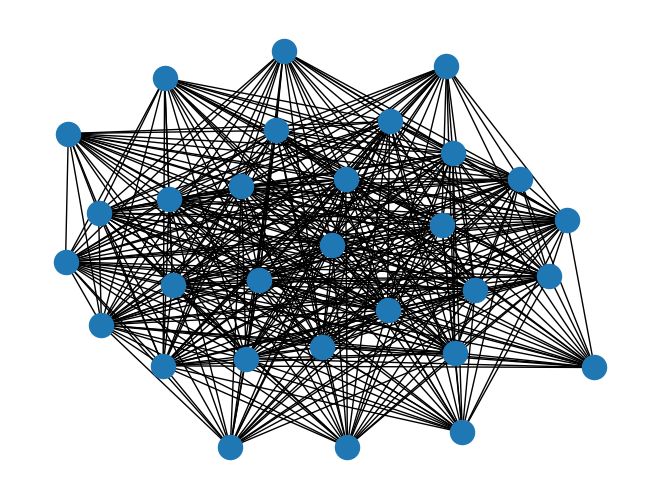

In [37]:
nx.draw(G)

In [38]:
dict_nodes = {
	row['Daerah']: {
		'Latitude': row['Latitude'],
  		'Longitude': row['Longitude'],
	} for _, row in df_lat_long.iterrows()
}

In [39]:
dict_nodes['Surabaya']

{'Latitude': -7.263360277, 'Longitude': 112.7456592}

In [40]:
nx.set_node_attributes(G, dict_nodes)

In [41]:
G.nodes.get('Surabaya')

{'Latitude': -7.263360277, 'Longitude': 112.7456592}

In [42]:
positions = {node: (data['Longitude'], data['Latitude']) for node, data in G.nodes(data=True)}

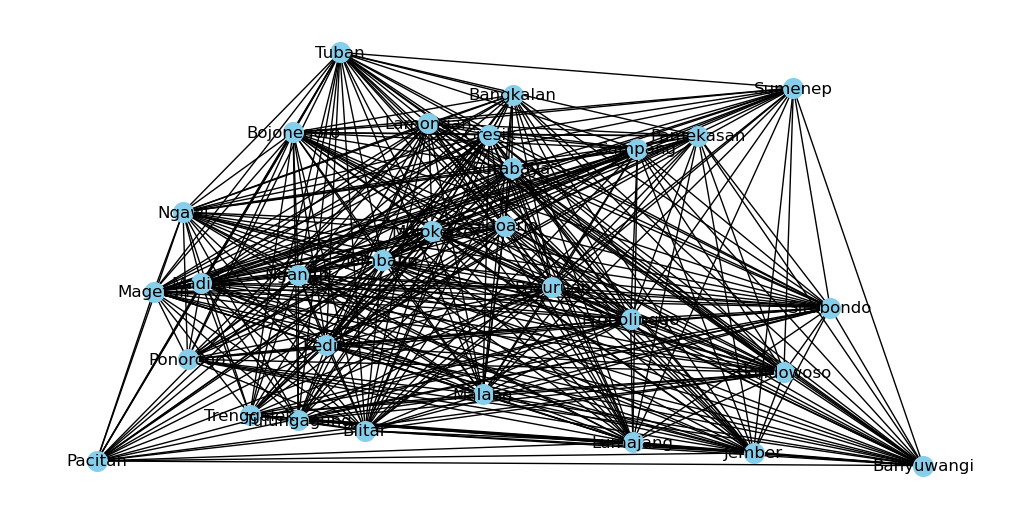

In [43]:
plt.figure(figsize=(10, 5))
nx.draw(G, pos=positions, with_labels=True, node_size=200, node_color='skyblue')

## STUDI KASUS:
1. Pak Fulan adalah orang Banyuwangi, beliau adalah pemilik dan sopir truk container truk.
2. Setiap minggu berangkat mengirim hasil Bumi ke Madiun.

3. Setelah dikirim, Pak Fulan tidak akan pulang dengan muatan kosong.
4. Beliau akan mencari “ceperan” dengan mengangkut barang lain, yang penting searah jalan pulang ke Banyuwangi. Selama jatah solar masih cukup.


## STUDI KASUS ANALISIS:
1. Pak Fulan mendapat job dari banyuwangi ke madiun untum mengirim hasil bumi.
2. Ketika, ingin pulang dari bumi ke banyuwangi, pak fulan ingin melihat apakah ada job di kota lain yang bisa ia ambil.
3. Apakah bensin nya cukup untuk job tersebut?
4. Apakah dengan ke kota tersebut rutenya sejalan dengan ke banyuwangi lagi?

5. Challenge: reward angkut maksimal dengan rute optimum
6. rute optimum yang dimaksud adalah
- Distance terpendek

- beban muatan terkecil
- bensin / money per liter terkecil 


## CHALLENGE: 
**Buat Algoritma (urutan langkah) Bagaimana cara memenangkan game Truck Simulator ? Dengan Reward Angkut Maksimal dan rute yang optimum.**


## RULE:
1. User bisa menginputkan start initial dan end goal.
2. User dapat men set jatah bensin untuk pulang.
3. Tidak boleh backtrack (tidak boleh kembali ke poin sebelumnya)
4. Simulasi harus menampilkan mana alternatif reward yang paling banyak.

5. User dapat men set batas maksimal muatan (ton)
6. Truk boleh memuat barang padat, cair dan gas. Tetapi tidak boleh memuat gas dengan barang padat dan cair.
7. Jika dikombinasikan maka muatan akan bertambah 4 ton untuk tangki cair maupun gas.
8. Konsumsi solar rata-rata truk adalah 20km / liter


In [44]:
df_edgelist = pd.read_csv('dataset/edgelist.csv')

In [45]:
df_edgelist

,source,target
0,Sumenep,Pamekasan
1,Pamekasan,Sampang
2,Bangkalan,Sampang
3,Bangkalan,Gresik
4,Lamongan,Gresik
5,Lamongan,Surabaya
6,Surabaya,Sidoarjo
7,Pasuruan,Probolinggo
8,Probolinggo,Situbondo
9,Situbondo,Bondowoso


In [46]:
G = nx.from_pandas_edgelist(df=df_edgelist, source='source', target='target')
nx.set_node_attributes(G, dict_nodes)
positions = {node: (data['Longitude'], data['Latitude']) for node, data in G.nodes(data=True)}

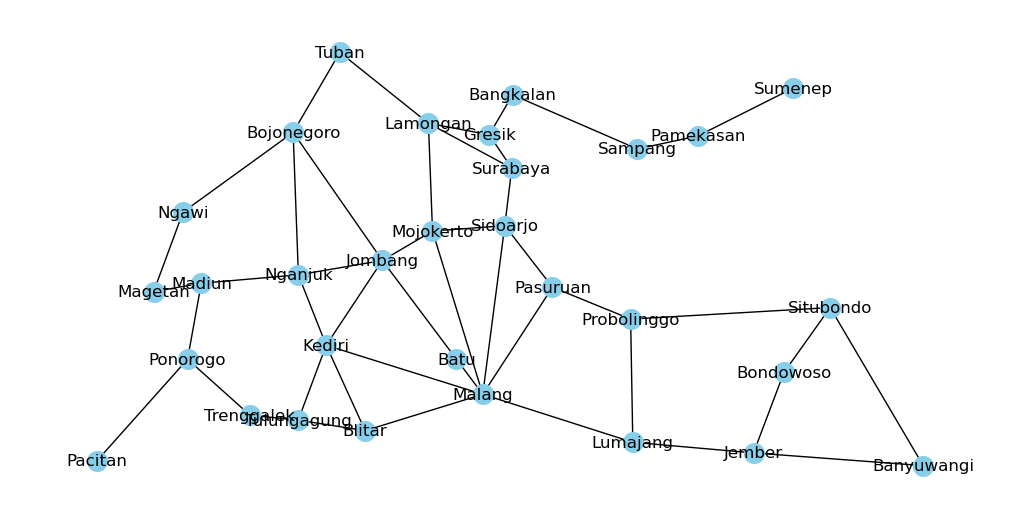

In [47]:
plt.figure(figsize=(10, 5))
nx.draw(G, pos=positions, with_labels=True, node_size=200, node_color='skyblue')

In [48]:
import heapq

In [49]:
from math import radians, sin, cos, sqrt, atan2

def harversine(lat1, lon1, lat2, lon2):
	# radius of the earth in kilometers
	R = 6371.0

	# convert latitude and longitude from degress to radians
	lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

	# difference in coordinates
	dlat = lat2 - lat1 
	dlon = lon2 - lon1 

	# harversine formula
	a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
	c = 2 * atan2(sqrt(a), sqrt(1 - a))
	distance = R * c # distance in kilometers

	return distance

instance of harversine formula

In [50]:
lat1, lon1 = G.nodes['Surabaya']['Latitude'], G.nodes['Surabaya']['Longitude']

In [51]:
lat2, lon2 = G.nodes['Malang']['Latitude'], G.nodes['Malang']['Longitude']

In [52]:
harversine(lat1, lon1, lat2, lon2)

80.97874896993277

In [53]:
def get_distance(G):
	dict_edge = {}
	for edge in list(G.edges.data()):
		initial = edge[0]
		goal = edge[1]
		lat1, lon1 = G.nodes[initial]['Latitude'], G.nodes[initial]['Longitude']
		lat2, lon2 = G.nodes[goal]['Latitude'], G.nodes[goal]['Longitude']
		distance = harversine(lat1, lon1, lat2, lon2)
		distance = round(distance)
		dict_edge[initial, goal] = {'distance': distance}
	return dict_edge

In [54]:
dict_edge = get_distance(G)
nx.set_edge_attributes(G, dict_edge)

In [55]:
len(dict_edge)

46

In [56]:
df_edgelist['distance'] = 0

In [57]:
# Loop over rows in the DataFrame
for i in range(len(df_edgelist)):
    source = str(df_edgelist.loc[i, 'source'])
    target = str(df_edgelist.loc[i, 'target'])
    
    # Safely get the distance value
    edge_data = dict_edge.get((source, target))  # Get the dictionary for the edge
    
    # Check if the edge exists in dict_edge
    if edge_data is None:
        edge_data = dict_edge.get((target, source))
        distance = edge_data['distance']
        df_edgelist.loc[i, 'distance'] = distance
        continue
    
    # Assign the distance back to the DataFrame
    distance = edge_data['distance'] 
    df_edgelist.loc[i, 'distance'] = distance


In [58]:
df_edgelist

,source,target,distance
0,Sumenep,Pamekasan,45
1,Pamekasan,Sampang,27
2,Bangkalan,Sampang,58
3,Bangkalan,Gresik,17
4,Lamongan,Gresik,27
5,Lamongan,Surabaya,40
6,Surabaya,Sidoarjo,21
7,Pasuruan,Probolinggo,36
8,Probolinggo,Situbondo,87
9,Situbondo,Bondowoso,31


In [59]:
edge_distance = nx.get_edge_attributes(G, 'distance')
edge_labels = {edge: f"{values} KM" for edge, values in edge_distance.items()}

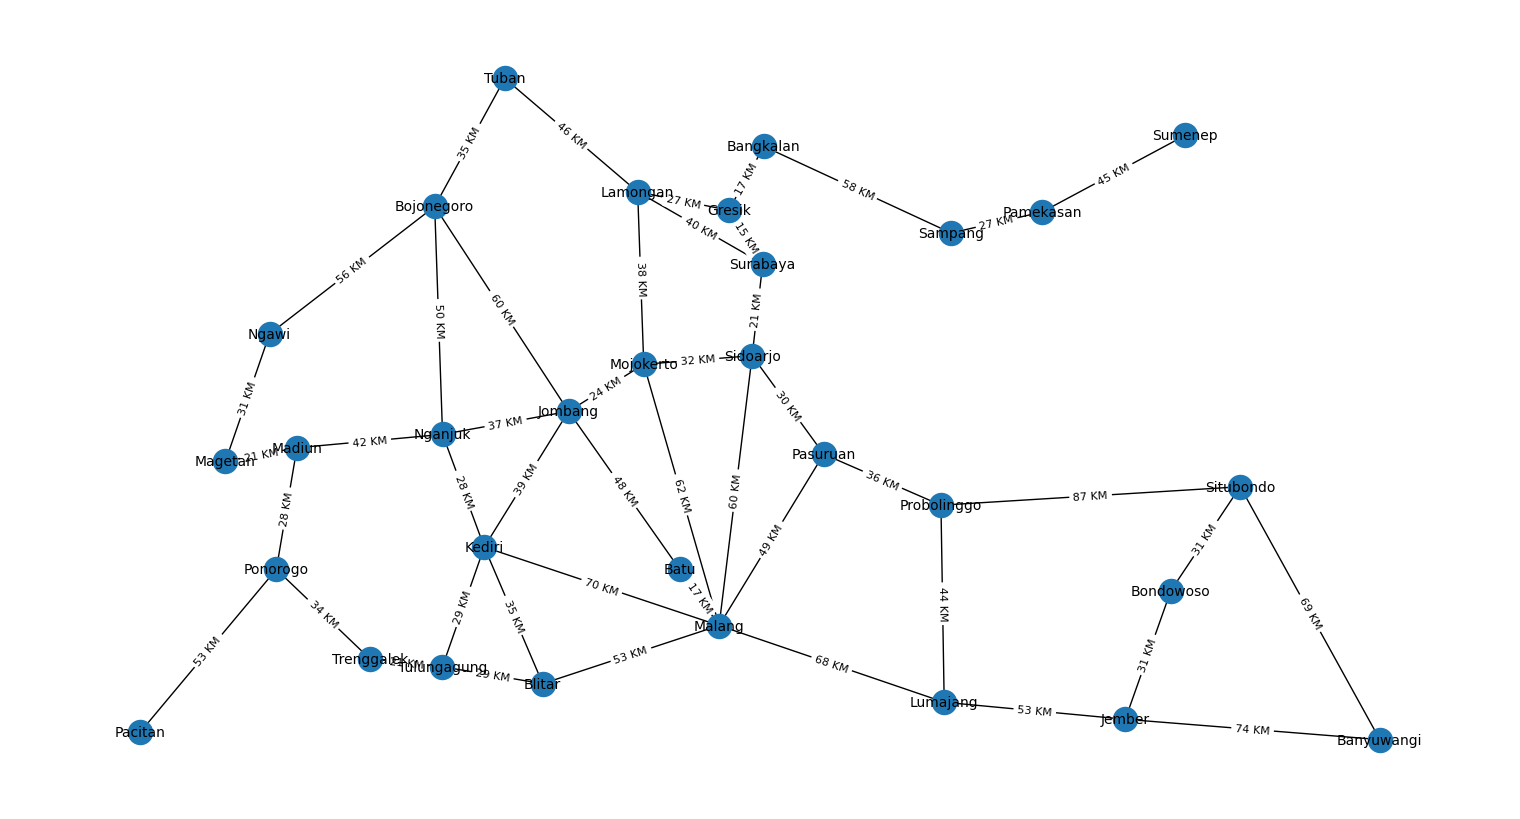

In [60]:
plt.figure(figsize=(15,8))
nx.draw(G, pos=positions, with_labels=True, font_size=10)
nx.draw_networkx_edge_labels(G, pos=positions, font_size=8, edge_labels=edge_labels)
plt.show()

In [61]:

def dijkstra(graph:dict, start_node):
     queue = []
     distances = {node: np.inf for node in graph}
     distances[start_node] = 0
     
     came_from = {node: None for node in graph}
     heapq.heappush(queue, (0, start_node))
     
     while queue:
          current_distance, current_node = heapq.heappop(queue)
          
          for neighbor, weight in dict(graph[current_node]).items():
               temp_distance = current_distance + weight
               if temp_distance < distances[neighbor]:
                    distances[neighbor] = temp_distance
                    came_from[neighbor] = current_node
                    heapq.heappush(queue, (temp_distance, neighbor))
                    
     
     # now let's make the traversal for all the nodes 
     step_by_step_paths = {}
     paths = []
     
     for target in graph:
          path = []
          step_by_step_edges = []
          node = target
          
          while node is not None:
               parent = came_from[node]
               if parent is not None:
                    step_by_step_edges.append((parent, node))
               path.append(node)
               node = parent
               
          path.reverse()
          step_by_step_edges.reverse()

          step_by_step_paths[target] = step_by_step_edges          
          paths.append(path)
          
     return distances, came_from, step_by_step_paths

In [62]:
def dijkstra_multiple_targets(graph: dict, source, targets):
     queue = []  
     distances = {node: float('inf') for node in graph}
     came_from = {node: None for node in graph}
     visited = set()
     
     heapq.heappush(queue, (0, source))
     distances[source] = 0
     
     while queue: 
          current_distance, current_node = heapq.heappop(queue)
          
          if current_node in visited:
               continue
          visited.add(current_node)
          
          if current_node in targets:
               break
          
          for neighbor, weight in graph[current_node].items():
               temp_distance = current_distance + weight['distance']
               if temp_distance < distances[neighbor]:
                    distances[neighbor] = temp_distance
                    came_from[neighbor] = current_node
                    heapq.heappush(queue, (temp_distance, neighbor))
                    
     all_paths = {}
     all_step_by_step_edges = {}
     
     for target in targets:
          path = []
          step_by_step_edges = []
          node = target 
          
          while node is not None:
               parent = came_from[node]
               if parent is not None:
                    step_by_step_edges.append((parent, node))
               path.append(node)
               node = parent
          
          path.reverse()
          step_by_step_edges.reverse()
          all_paths[target] = path 
          all_step_by_step_edges[target] = step_by_step_edges
     
     return all_step_by_step_edges

In [63]:
dijkstra_multiple_targets(G, 'Surabaya', ['Situbondo'])

{'Situbondo': [('Surabaya', 'Sidoarjo'),
  ('Sidoarjo', 'Pasuruan'),
  ('Pasuruan', 'Probolinggo'),
  ('Probolinggo', 'Situbondo')]}

In [64]:
def get_total_distance(G, initial, goal):
	total_distance = 0
	paths = dijkstra_multiple_targets(G, initial,[goal])
	for keys, edges in paths.items():
		for edge in edges:
			total_distance += G.edges.get((edge))['distance']
	return total_distance

In [65]:
get_total_distance(G, 'Surabaya', 'Situbondo')

174

assign distances untuk tiap tripnya

In [66]:
df['DISTANCE'] = 0
for i in range(len(df)):
	initial = str(df.loc[i, 'INITIAL'])
	goal = str(df.loc[i, 'GOAL'])
	df.loc[i, 'DISTANCE'] = get_total_distance(G, initial, goal)

assign solar yang dibutuhkan (liters) bedasarkan distance / 20

In [67]:
df['SOLAR (L)'] = 0
for i in range(len(df)):
	distance = int(df.loc[i, 'DISTANCE'])
	df.loc[i, 'SOLAR (L)'] = round(distance / 20)

In [68]:
df.head()

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L)
0,Bondowoso,Pacitan,15,1655000,GAS,Bondowoso-Pacitan,342,17
1,Bondowoso,Pacitan,25,2005000,PADAT,Bondowoso-Pacitan,342,17
2,Bondowoso,Pacitan,30,2180000,CAIR,Bondowoso-Pacitan,342,17
3,Bondowoso,Ponorogo,15,1465000,GAS,Bondowoso-Ponorogo,289,14
4,Bondowoso,Ponorogo,25,1815000,PADAT,Bondowoso-Ponorogo,289,14


In [69]:
pair_jenis = df.groupby('PAIR').size().reset_index()
pair_jenis['UNIQUE'] = ''

In [70]:
for pair in pair_jenis['PAIR'].unique():
	values = df[df['PAIR'] == pair]['JENIS'].unique()
	values = ' '.join(values)
	pair_jenis.loc[pair_jenis['PAIR'] == pair, 'UNIQUE'] = values 

In [71]:
(pair_jenis['UNIQUE'] != 'GAS PADAT CAIR').sum()

0

### Solution Analysis
1. buat rute dari initial ke goal
2. jika masih ada bensin, maka cari job yang memerlukan bensin kurang dari sisa
3. pilih job dengan reward angkut yang maksimal dan rute yang optimum
4. lalu kembali lagi ke initial (rumah) setelah melakukan job dengan bensin yang tersisa
5. Bensin setelah job utama = Job Bensin + Bensin Pulang setelah job

6. Since each PAIR has all the unique values in JENIS;
7. We're going to give filtering, 
8. if the muatan input can get all the JENIS, don't do these things:
- Gas with Padat and Cair
But, it's fine to do:
- Gas with Padat
- Gas with Cair
- Padat with Cair
9. However if you combined the 3 combos above, consider this:
- Tangki is increase by 4 ton for either cair / gas
- Gas (+4ton) with Padat 
- Gas (+4ton) with Cair (+4ton)
- Padat with Cair (+4ton)
10. This calc should be consider whether we can use it for the trip or not

In [72]:
df_edgelist['pair'] = ''
for i in range(len(df_edgelist)):
     df_edgelist.loc[i, 'pair'] = ' '.join(df_edgelist[['source', 'target']].iloc[i].values)

In [73]:
df_edgelist.head()

,source,target,distance,pair
0,Sumenep,Pamekasan,45,Sumenep Pamekasan
1,Pamekasan,Sampang,27,Pamekasan Sampang
2,Bangkalan,Sampang,58,Bangkalan Sampang
3,Bangkalan,Gresik,17,Bangkalan Gresik
4,Lamongan,Gresik,27,Lamongan Gresik


In [74]:
from collections import Counter

In [75]:
def get_distance(path, df_edgelist):
	distance = 0
	for i in range(1, len(path)):
		path1 = f'{path[i-1]} {path[i]}'
		path2 = f'{path[i]} {path[i-1]}'
		distance += int(df_edgelist.loc[df_edgelist['pair'].str.contains(f'{path1}|{path2}'), 'distance'].values[0])
	return distance

def get_side_job(route_df):
	input_total_side_job = int(input('Input how many side jobs: '))
	indices_side_job = []
	for i in range(input_total_side_job):
		input_index_side_job = int(input(f'{i+1} job: '))
		if input_index_side_job in route_df.index:
			indices_side_job.append(input_index_side_job)
		elif input_index_side_job not in route_df.index:
			raise ValueError("== THE INDEX IS NOT AVAILABLE ==")
	return indices_side_job

def check_combo(route_df, indices_side_job):
	jenis_muatan = np.sort(route_df.loc[indices_side_job, 'JENIS'].values)
	if set(jenis_muatan) == {'CAIR', 'GAS', 'PADAT'}:
		raise ValueError("== THIS COMBO IS NOT ALLOWED ==")
	return jenis_muatan

def check_combo_addition(jenis_muatan):
	jenis_counter = dict(Counter(jenis_muatan))
	addition_muatan = np.sum([
     	jenis_counter.get(jenis) for jenis in set(jenis_muatan) 
      	if (jenis == 'CAIR') | (jenis == 'GAS')
     ]) * 4
	return addition_muatan

def calc_muatan_after_addition(route_df, indices_side_job, addition_muatan, muatan):
	total_muatan = np.sum(route_df.loc[indices_side_job, 'BEBAN MUATAN (TON)'].values)
	total_muatan += addition_muatan
	if total_muatan > muatan:
		raise ValueError("== TRUCK CAPACITY IS NOT ENOUGH ==")
	return total_muatan

def get_reward_df(df, initial, goal):
	filtered = df[(df['INITIAL'] == initial) & (df['GOAL'] == goal)]
	if filtered.empty:
		return 0, 0
	filtered = filtered.sort_values(['REWARD', 'SOLAR (L)', 'DISTANCE'], ascending=[False, True, True])
	index = np.argmax(list(filtered['REWARD']))
	reward_end = filtered['REWARD'].iloc[index]
	return reward_end, 1

def highlight_path(G, pos, route):
	plt.figure(figsize=(15, 7), edgecolor='white')
	edge_list = list(zip(route, route[1:]))
	edge_label = nx.get_edge_attributes(G, 'distance')

	nx.draw_networkx_nodes(G, pos=pos)
	nx.draw_networkx_edges(G, pos=pos)

	nx.draw_networkx_nodes(G, pos=pos, node_color='red', nodelist=route)
	nx.draw_networkx_edges(G, pos=pos, edge_color='red', edgelist=edge_list)

	nx.draw_networkx_labels(G, pos=pos)
	nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_label)
	plt.show()

In [76]:
import sys

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L),JOB_BACK_HOME,INITIAL_BACK,GOAL_BACK,REWARDS_BACK,DISTANCE_BACK,TOTAL_REWARDS,PATH,TOTAL_DISTANCE_PATH,TOTAL_SOLAR
1499,Malang,Banyuwangi,30,1647500,CAIR,Malang-Banyuwangi,195,10,1,Banyuwangi,Surabaya,1770000,276,4690000,"[Surabaya, Sidoarjo, Malang, Lumajang, Jember,...",552,27.60
1553,Malang,Pamekasan,30,1580000,CAIR,Malang-Pamekasan,198,10,0,Pamekasan,Surabaya,0,117,2852500,"[Surabaya, Sidoarjo, Malang, Mojokerto, Lamong...",427,21.35
1535,Malang,Bojonegoro,30,1542500,CAIR,Malang-Bojonegoro,125,6,0,Bojonegoro,Surabaya,0,121,2815000,"[Surabaya, Sidoarjo, Malang, Mojokerto, Jomban...",348,17.40
1483,Malang,Ponorogo,30,1537500,PADAT,Malang-Ponorogo,137,7,0,Ponorogo,Surabaya,0,218,2810000,"[Surabaya, Sidoarjo, Malang, Blitar, Tulungagu...",436,21.80
1555,Malang,Sumenep,25,1535000,PADAT,Malang-Sumenep,243,12,0,Sumenep,Surabaya,0,162,2807500,"[Surabaya, Sidoarjo, Malang, Mojokerto, Lamong...",517,25.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Malang,Tulungagung,10,627500,PADAT,Malang-Tulungagung,82,4,0,Tulungagung,Surabaya,0,163,1900000,"[Surabaya, Sidoarjo, Malang, Blitar, Tulungagu...",326,16.30
1543,Malang,Gresik,10,617500,PADAT,Malang-Gresik,96,5,0,Gresik,Surabaya,0,15,1890000,"[Surabaya, Sidoarjo, Malang, Mojokerto, Lamong...",223,11.15
1561,Malang,Kediri,10,600000,PADAT,Malang-Kediri,70,4,1,Kediri,Surabaya,1357500,151,3230000,"[Surabaya, Sidoarjo, Malang, Kediri, Malang, S...",302,15.10
1507,Malang,Probolinggo,10,585000,PADAT,Malang-Probolinggo,85,4,1,Probolinggo,Surabaya,1322500,87,3180000,"[Surabaya, Sidoarjo, Malang, Pasuruan, Proboli...",253,12.65


=== THESE ARE YOUR CHOICES ===


,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L),JOB_BACK_HOME,INITIAL_BACK,GOAL_BACK,REWARDS_BACK,DISTANCE_BACK,TOTAL_REWARDS,PATH,TOTAL_DISTANCE_PATH,TOTAL_SOLAR
1512,Malang,Sidoarjo,30,1215000,GAS,Malang-Sidoarjo,60,3,1,Sidoarjo,Surabaya,1105000,21,3592500,"[Surabaya, Sidoarjo, Malang, Sidoarjo, Surabaya]",162,8.1
1514,Malang,Sidoarjo,25,1040000,CAIR,Malang-Sidoarjo,60,3,1,Sidoarjo,Surabaya,1105000,21,3417500,"[Surabaya, Sidoarjo, Malang, Sidoarjo, Surabaya]",162,8.1
1513,Malang,Sidoarjo,16,725000,PADAT,Malang-Sidoarjo,60,3,1,Sidoarjo,Surabaya,1105000,21,3102500,"[Surabaya, Sidoarjo, Malang, Sidoarjo, Surabaya]",162,8.1







==== HERE IS YOUR TRIP ====
Initial: Surabaya
Goal: Malang
Solar: 60
Capacity: 60
Distance: 81
Reward: 1272500 

From point: Malang
To point: Sidoarjo
Reward side job: 1765000
Muatan side job: 41
Jenis side job: ['PADAT', 'CAIR'] 

Initial back: Sidoarjo
Goal back: Surabaya
Rewards back: 1105000
Distance back: 21 

Total rewards: 4142500
Total Distance: 162
Total solar: 8.1
Path: ['Surabaya', 'Sidoarjo', 'Malang', 'Sidoarjo', 'Surabaya']


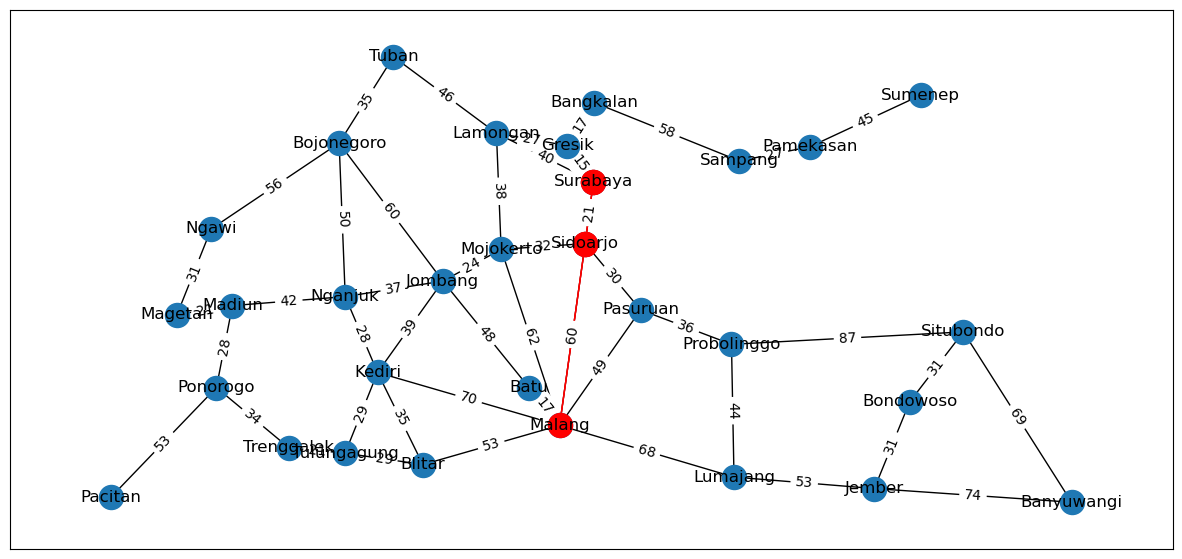

In [86]:
initials = df['INITIAL'].values
goals = df['GOAL'].values
initial = input('Input Starting Point: ')
if initial not in initials:
	raise ValueError("== WRONG INITIAL ==")
goal = input('Input Ending Point: ')
if goal not in goals:
	raise ValueError("== WRONG GOAL ==")
muatan_start = int(input('Limit muatan (ton): '))
solar_start = int(input('Input Solar Capacity (L): '))
pair_start = f'{initial}-{goal}'


if solar_start != 0:
	all_paths = []
	all_solar = []
	all_rewards = []
	all_distances = []
	all_job_back_home = []
	all_initial_back = []
	all_goal_back = []
	all_rewards_back = []
	all_distances_back = []
 
	path_start = nx.shortest_path(G, source=initial, target=goal)
	reward_start, get_start_job = get_reward_df(df, initial, goal)
	distance_start = get_distance(path_start, df_edgelist)
 
	route_df = df[df['INITIAL'] == goal]
	solar_filteration = route_df[route_df['SOLAR (L)'] <= solar_start]
	muatan_filteration = solar_filteration[solar_filteration['BEBAN MUATAN (TON)'] < muatan_start]
	route_df = muatan_filteration
	route_df = route_df.sort_values(['REWARD', 'SOLAR (L)', 'DISTANCE'], ascending=[False, True, True])
 
	for i in route_df.index:
		paths = [] 
		job_back_home = 0
		total_rewards = 0
		paths.append(path_start)
		total_rewards += reward_start


		initial_bridge = goal
		goal_bridge = str(route_df.loc[i, 'GOAL'])
		path_bridge = nx.shortest_path(G, source=initial_bridge, target=goal_bridge)
		paths.append(path_bridge[1:])
		distance_bridge = get_distance(path_bridge, df_edgelist)
		reward_bridge = route_df.loc[i, 'REWARD']

  
		initial_end = goal_bridge
		goal_end = initial
		path_end = nx.shortest_path(G, source=initial_end, target=initial)
		paths.append(path_end[1:])
		distance_back = get_distance(path_end, df_edgelist)
		reward_end, job_back_home = get_reward_df(df, initial=initial_end, goal=goal_end)
   
   
		total_rewards = (reward_start + reward_bridge + reward_end)
		all_rewards_back.append(reward_end)
		all_distances_back.append(distance_back)
		all_initial_back.append(initial_end)
		all_goal_back.append(goal_end)
		flattened_paths = [item for sublist in paths for item in sublist]  
		all_paths.append(flattened_paths)
		all_rewards.append(total_rewards)
		all_job_back_home.append(job_back_home)
  
  
	route_df['JOB_BACK_HOME'] = all_job_back_home
	route_df['INITIAL_BACK'] = all_initial_back
	route_df['GOAL_BACK'] = all_goal_back
	route_df['REWARDS_BACK'] = all_rewards_back
	route_df['DISTANCE_BACK'] = all_distances_back
	route_df['TOTAL_REWARDS'] = all_rewards
	route_df['PATH'] = all_paths
 
  
	for path in all_paths:
		distance = get_distance(path, df_edgelist)
		all_distances.append(distance)
	route_df['TOTAL_DISTANCE_PATH'] = all_distances
	route_df['TOTAL_SOLAR'] = route_df['TOTAL_DISTANCE_PATH'] / 20	
	
 
	route_df = route_df[route_df['TOTAL_SOLAR'] < solar_start]\
 	.sort_values(['REWARD', 'SOLAR (L)', 'DISTANCE'], ascending=[False, True, True])
	display(route_df)
	if len(route_df) == 0:
		raise ValueError("== YOU CAN'T GO HOME WITH THIS AMOUNT OF SOLAR ==")
		 
	
	input_goal_side_job = input('Which side job do you want? (input GOAL): ')
	route_df = route_df[route_df['GOAL'] == input_goal_side_job]
	if len(route_df) == 0:
		raise ValueError("== YOU INPUT WRONG GOAL OF THE SIDE JOB ==")
	print('=== THESE ARE YOUR CHOICES ===')
	display(route_df.sort_values(['REWARD', 'SOLAR (L)', 'DISTANCE'], ascending=[False, True, True]))
	
 
	indices_side_job = get_side_job(route_df)
	jenis_muatan = check_combo(route_df, indices_side_job)
	addition_muatan = check_combo_addition(jenis_muatan)
	total_muatan = calc_muatan_after_addition(route_df, list(set(indices_side_job)), addition_muatan, muatan_start)
 
 
	print('\n\n\n\n')
	print('==== HERE IS YOUR TRIP ====')
	print(f'Initial: {initial}')
	print(f'Goal: {goal}')
	print(f'Solar: {solar_start}')
	print(f'Capacity: {muatan_start}')
	print(f'Distance: {distance_start}')
	print(f'Reward: {reward_start} \n')
	
 
	total_rewards_side_job = 0
	total_muatan_side_job = 0
	all_jenis_side_job = [] 
	for i, index in enumerate(indices_side_job):
		from_point = route_df.loc[index, 'INITIAL']
		to_point = route_df.loc[index, 'GOAL']
		distance_side_job = route_df.loc[index, 'DISTANCE']
		reward_side_job = route_df.loc[index, 'REWARD']
		jenis_side_job = route_df.loc[index, 'JENIS']
		muatan_side_job = route_df.loc[index, 'BEBAN MUATAN (TON)']
		total_rewards_side_job += reward_side_job
		total_muatan_side_job += muatan_side_job
		all_jenis_side_job.append(jenis_side_job)
		# print(f'Job {i+1}')
		# print(f'From point: {from_point}')
		# print(f'To point: {to_point}')
		# print(f'Reward: {reward}')
		# print(f'Jenis: {jenis}')
		# print(f'Beban muatan ton: {kapasitas}\n')
	print(f'From point: {from_point}')
	print(f'To point: {to_point}')
	print(f'Reward side job: {total_rewards_side_job}')
	print(f'Muatan side job: {total_muatan_side_job}')
	print(f'Jenis side job: {all_jenis_side_job} \n')
  
  
	initial_back = route_df['INITIAL_BACK'].iloc[0]
	goal_back = route_df['GOAL_BACK'].iloc[0]
	rewards_back = route_df['REWARDS_BACK'].iloc[0]
	distance_back = route_df['DISTANCE_BACK'].iloc[0]
	initial_row = df[(df['INITIAL'] == initial_back) & (df['GOAL'] == goal_back)]
	print(f'Initial back: {initial_back}')
	print(f'Goal back: {goal_back}')
	print(f'Rewards back: {rewards_back}')
	print(f'Distance back: {distance_back} \n')
 
 
	total_distance_path = route_df['TOTAL_DISTANCE_PATH'].iloc[0]
	total_solar = route_df['TOTAL_SOLAR'].iloc[0]
	total_rewards = (reward_start + total_rewards_side_job + rewards_back)
	path = route_df['PATH'].iloc[0]
	print(f'Total rewards: {total_rewards}')
	print(f'Total Distance: {total_distance_path}')
	print(f'Total solar: {total_solar}')
	print(f'Path: {path}')
	highlight_path(G, pos=positions, route=path)


In [155]:
df[(df['INITIAL'] == 'Surabaya') & (df['GOAL'] == 'Gresik')]

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L)
1281,Surabaya,Gresik,15,570000,GAS,Surabaya-Gresik,15,1
1282,Surabaya,Gresik,25,920000,PADAT,Surabaya-Gresik,15,1
1283,Surabaya,Gresik,30,1095000,CAIR,Surabaya-Gresik,15,1


In [156]:
df[(df['INITIAL'] == 'Gresik') & (df['GOAL'] == 'Situbondo')]

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L)
1905,Gresik,Situbondo,15,1097500,GAS,Gresik-Situbondo,189,9
1906,Gresik,Situbondo,25,1447500,PADAT,Gresik-Situbondo,189,9
1907,Gresik,Situbondo,30,1622500,CAIR,Gresik-Situbondo,189,9


In [157]:
df[(df['INITIAL'] == 'Situbondo') & (df['GOAL'] == 'Surabaya')]

,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS,PAIR,DISTANCE,SOLAR (L)
165,Situbondo,Surabaya,15,1052500,GAS,Situbondo-Surabaya,174,9
166,Situbondo,Surabaya,25,1402500,PADAT,Situbondo-Surabaya,174,9
167,Situbondo,Surabaya,30,1577500,CAIR,Situbondo-Surabaya,174,9


In [158]:
initials = set(initials)
goals = set(goals)

In [159]:
data = {
	'DF': df,
	'G': G,
	'DF_EDGELIST': df_edgelist,
	'INITIAL': initials,
	'GOAL': goals,
	'POS': positions,
}

In [160]:
import pickle
with open('data.pkl', 'wb') as file:
     pickle.dump(data, file)

In [79]:
for node in G.nodes:
	if 'pos' not in G.nodes[node]:
		G.nodes[node]['pos'] = (df_lat_long.loc[df_lat_long['Daerah'] == node, 'Longitude'].values[0], df_lat_long.loc[df_lat_long['Daerah'] == node, 'Latitude'].values[0])
edge_paths = [
	{"path": [G.nodes[edge[0]]["pos"], G.nodes[edge[1]]["pos"]]}
	for edge in G.edges
]

In [117]:
edge_paths

[{'path': [(113.8598558, -7.008399544), (113.4826442, -7.16062943)]},
 {'path': [(113.4826442, -7.16062943), (113.24261, -7.202284062)]},
 {'path': [(113.24261, -7.202284062), (112.7487091, -7.030080054)]},
 {'path': [(112.7487091, -7.030080054), (112.6561413, -7.157130595)]},
 {'path': [(112.6561413, -7.157130595), (112.4156663, -7.120441764)]},
 {'path': [(112.6561413, -7.157130595), (112.7456592, -7.263360277)]},
 {'path': [(112.4156663, -7.120441764), (112.7456592, -7.263360277)]},
 {'path': [(112.4156663, -7.120441764), (112.4317742, -7.463309884)]},
 {'path': [(112.4156663, -7.120441764), (112.065159, -6.895011679)]},
 {'path': [(112.7456592, -7.263360277), (112.7178012, -7.446228375)]},
 {'path': [(112.7178012, -7.446228375), (112.6306718, -7.982646369)]},
 {'path': [(112.7178012, -7.446228375), (112.906654, -7.641949693)]},
 {'path': [(112.7178012, -7.446228375), (112.4317742, -7.463309884)]},
 {'path': [(112.906654, -7.641949693), (113.2159045, -7.743461818)]},
 {'path': [(112

In [118]:
df_lat_long['pos'] = [ tuple(df_lat_long[['Longitude', 'Latitude']].iloc[i]) for i in range(len(df_lat_long)) ]

In [115]:
sub_edge_paths = [
	{'path': 
      	[
			df_lat_long.loc[df_lat_long['Daerah'] == path[i-1], 'pos'].values[0],
			df_lat_long.loc[df_lat_long['Daerah'] == path[i], 'pos'].values[0]
		]
     } for i in range(1, len(path))
]

In [116]:
sub_edge_paths

[{'path': [(112.7456592, -7.263360277), (112.7178012, -7.446228375)]},
 {'path': [(112.7178012, -7.446228375), (112.6306718, -7.982646369)]},
 {'path': [(112.6306718, -7.982646369), (112.7178012, -7.446228375)]},
 {'path': [(112.7178012, -7.446228375), (112.7456592, -7.263360277)]}]